In [9]:
import os
import pandas as pd
import sys

sys.path.append("..")
import os

# load json dict from review files
import json

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300

In [14]:
def load_scores(base_dir):
    review_paths = {
        "gpt4o-runs": [],
        "claude-runs": [],
        "deepseek-runs": [],
        "llama3.1-runs": [],
    }
    for dir in review_paths.keys():
        # Get paper directories in dir
        full_dir = os.path.join(base_dir, dir)
        subdirs = next(os.walk(full_dir))[1]
        print(f"Directories found for {full_dir}: {len(subdirs)}")

        # Check if paper exists in directory and generate txt file if so
        paper_gen_counter = 0
        for s_dir in subdirs:
            paper_name = s_dir[16:]
            if os.path.exists(f"{full_dir}/{s_dir}/review.txt"):
                review_paths[dir].append(f"{full_dir}/{s_dir}/review.txt")
                paper_gen_counter += 1
        print(f"Review txt found for {full_dir}: {paper_gen_counter}")

    reviews = {
        "gpt4o-runs": [],
        "claude-runs": [],
        "deepseek-runs": [],
        "llama3.1-runs": [],
    }
    for dir in review_paths.keys():
        for review_file in review_paths[dir]:
            # load json for review file
            with open(review_file, "r") as f:
                r = json.load(f)
            reviews[dir].append(int(r["Overall"]))
            if int(r["Overall"]) == 6:
                print(f"Overall score of 6 for {review_file}")

    results = {
        "sonnet-3.5": reviews["claude-runs"],
        "gpt-4o": reviews["gpt4o-runs"],
        "deepseek": reviews["deepseek-runs"],
        "llama3.1": reviews["llama3.1-runs"],
    }
    for d in results.keys():
        print(
            f"Model {d} - Min: {min(results[d])}, Max: {max(results[d])}, Mean: {sum(results[d])/len(results[d])}"
        )
    return results

In [15]:
scores_nanogpt_fs_0 = load_scores("nanoGPT")
scores_diffusion_fs_0 = load_scores("diffusion")
scores_grokking_fs_0 = load_scores("grokking")

Directories found for nanoGPT/gpt4o-runs: 44
Review txt found for nanoGPT/gpt4o-runs: 16
Directories found for nanoGPT/claude-runs: 50
Review txt found for nanoGPT/claude-runs: 20
Directories found for nanoGPT/deepseek-runs: 37
Review txt found for nanoGPT/deepseek-runs: 23
Directories found for nanoGPT/llama3.1-runs: 41
Review txt found for nanoGPT/llama3.1-runs: 21
Overall score of 6 for nanoGPT/claude-runs/20240727_155433_fixed_interval_semantic_summaries/review.txt
Overall score of 6 for nanoGPT/claude-runs/20240727_083221_hierarchical_chunk_attention/review.txt
Model sonnet-3.5 - Min: 3, Max: 6, Mean: 4.2
Model gpt-4o - Min: 3, Max: 5, Mean: 3.6875
Model deepseek - Min: 3, Max: 5, Mean: 3.782608695652174
Model llama3.1 - Min: 2, Max: 3, Mean: 2.9523809523809526
Directories found for diffusion/gpt4o-runs: 42
Review txt found for diffusion/gpt4o-runs: 17
Directories found for diffusion/claude-runs: 49
Review txt found for diffusion/claude-runs: 38
Directories found for diffusion/dee

In [26]:
# Load dataframe with results
all_scores = {
    "gpt4o": None,
    "claude": None,
    "deepseek": None,
    "llama3.1": None,
}


def load_1fs_scores(base_dir):
    for model in all_scores.keys():
        llm_ratings = pd.read_csv(f"{base_dir}/{model}-runs_ratings.csv")
        llm_ratings.set_index("paper_id", inplace=True)
        scores = llm_ratings["Overall"].tolist()
        all_scores[model] = scores
        print(
            f"Model {model} - Min: {min(scores)}, Max: {max(scores)}, Mean: {sum(scores)/len(scores)}"
        )
    scores = {
        "sonnet-3.5": all_scores["claude"],
        "gpt-4o": all_scores["gpt4o"],
        "deepseek": all_scores["deepseek"],
        "llama3.1": all_scores["llama3.1"],
    }
    return scores

In [27]:
scores_nanogpt_fs_1 = load_1fs_scores("nanoGPT")
scores_diffusion_fs_1 = load_1fs_scores("diffusion")
scores_grokking_fs_1 = load_1fs_scores("grokking")

Model gpt4o - Min: 3, Max: 5, Mean: 3.25
Model claude - Min: 3, Max: 5, Mean: 4.05
Model deepseek - Min: 3, Max: 4, Mean: 3.210526315789474
Model llama3.1 - Min: 1, Max: 3, Mean: 2.3157894736842106
Model gpt4o - Min: 3, Max: 5, Mean: 3.7058823529411766
Model claude - Min: 3, Max: 6, Mean: 3.8157894736842106
Model deepseek - Min: 3, Max: 5, Mean: 3.3214285714285716
Model llama3.1 - Min: 1, Max: 3, Mean: 2.3
Model gpt4o - Min: 2, Max: 3, Mean: 2.9166666666666665
Model claude - Min: 3, Max: 5, Mean: 3.44
Model deepseek - Min: 3, Max: 4, Mean: 3.125
Model llama3.1 - Min: 1, Max: 3, Mean: 2.0


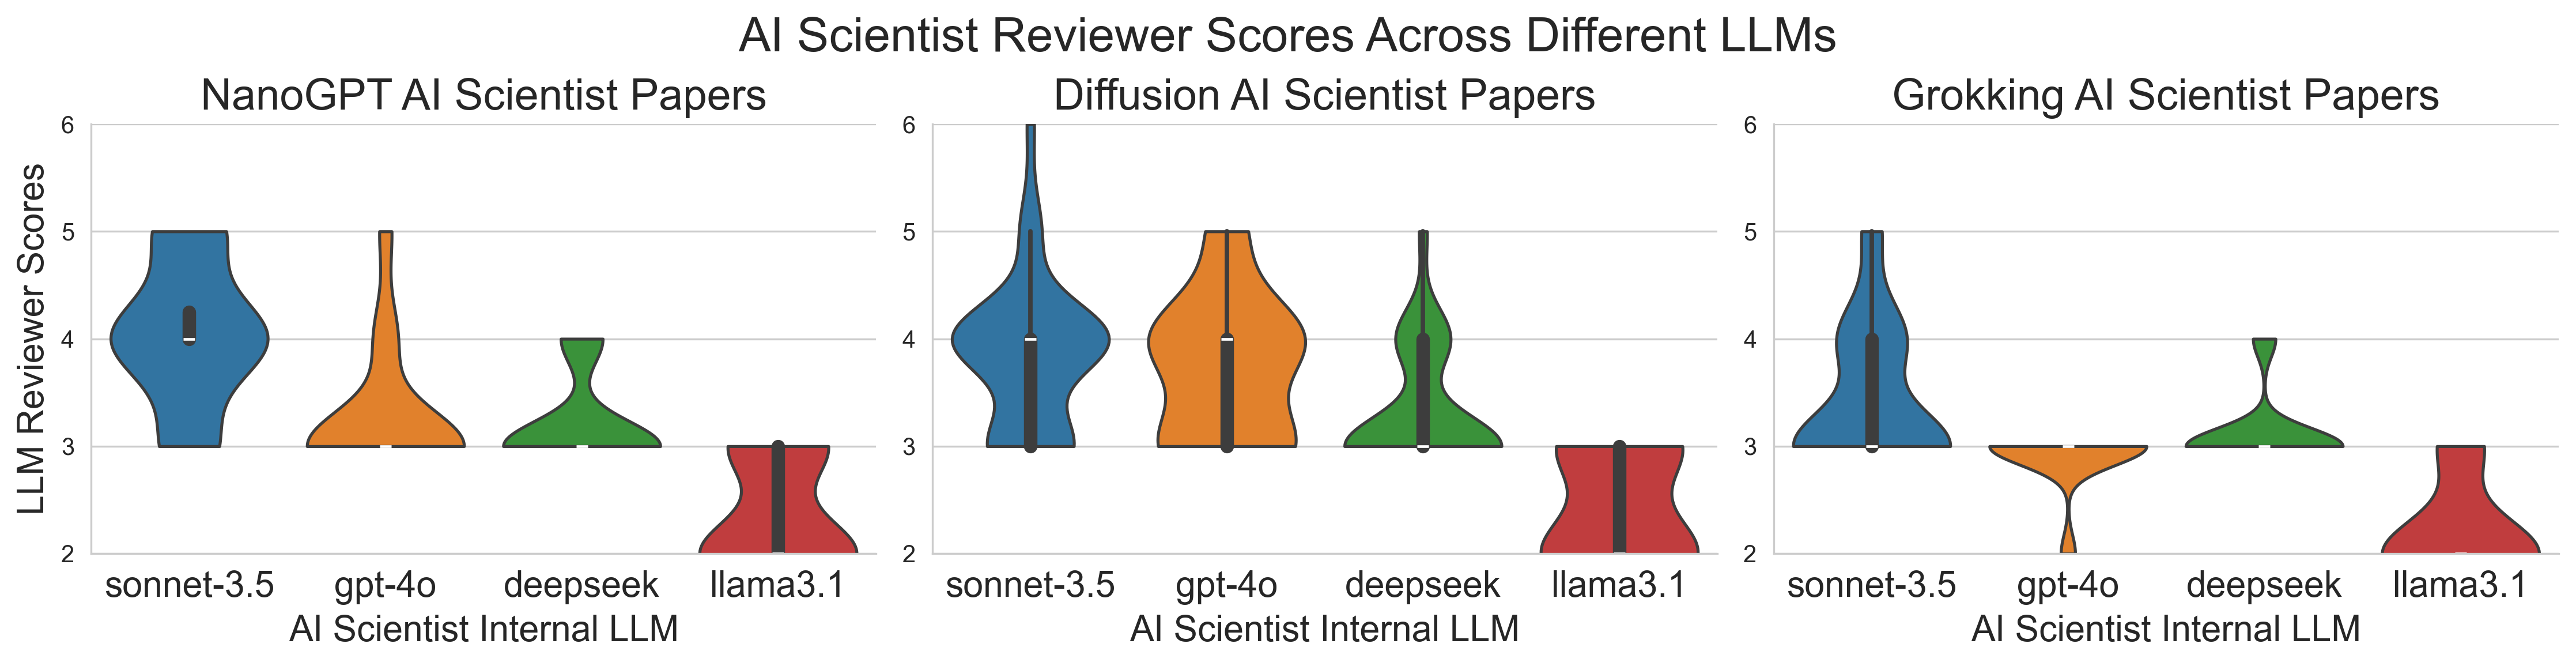

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# sns grid style with lines
sns.set_style("whitegrid")
from matplotlib.ticker import MaxNLocator


sns.violinplot(data=scores_nanogpt_fs_1, ax=axs[0], cut=0)
# set axis splines off
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[0].set_ylabel("LLM Reviewer Scores", fontsize=15)
axs[0].set_xlabel("AI Scientist Internal LLM", fontsize=15)
axs[0].set_title("NanoGPT AI Scientist Papers", fontsize=18)
axs[0].tick_params(axis="x", labelsize=15)
axs[0].set_ylim(2, 6)
axs[0].yaxis.set_major_locator(MaxNLocator(integer=True))


sns.violinplot(data=scores_diffusion_fs_1, ax=axs[1], cut=0)
# set axis splines off
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[1].set_xlabel("AI Scientist Internal LLM", fontsize=15)
axs[1].set_title("Diffusion AI Scientist Papers", fontsize=18)
axs[1].tick_params(axis="x", labelsize=15)
axs[1].set_ylim(2, 6)
axs[1].yaxis.set_major_locator(MaxNLocator(integer=True))

sns.violinplot(data=scores_grokking_fs_1, ax=axs[2], cut=0)
# set axis splines off
axs[2].spines["top"].set_visible(False)
axs[2].spines["right"].set_visible(False)
axs[2].set_xlabel("AI Scientist Internal LLM", fontsize=15)
axs[2].set_title("Grokking AI Scientist Papers", fontsize=18)
axs[2].tick_params(axis="x", labelsize=15)
axs[2].set_ylim(2, 6)
axs[2].yaxis.set_major_locator(MaxNLocator(integer=True))

fig.suptitle("AI Scientist Reviewer Scores Across Different LLMs", fontsize=20, y=0.95)
plt.tight_layout()

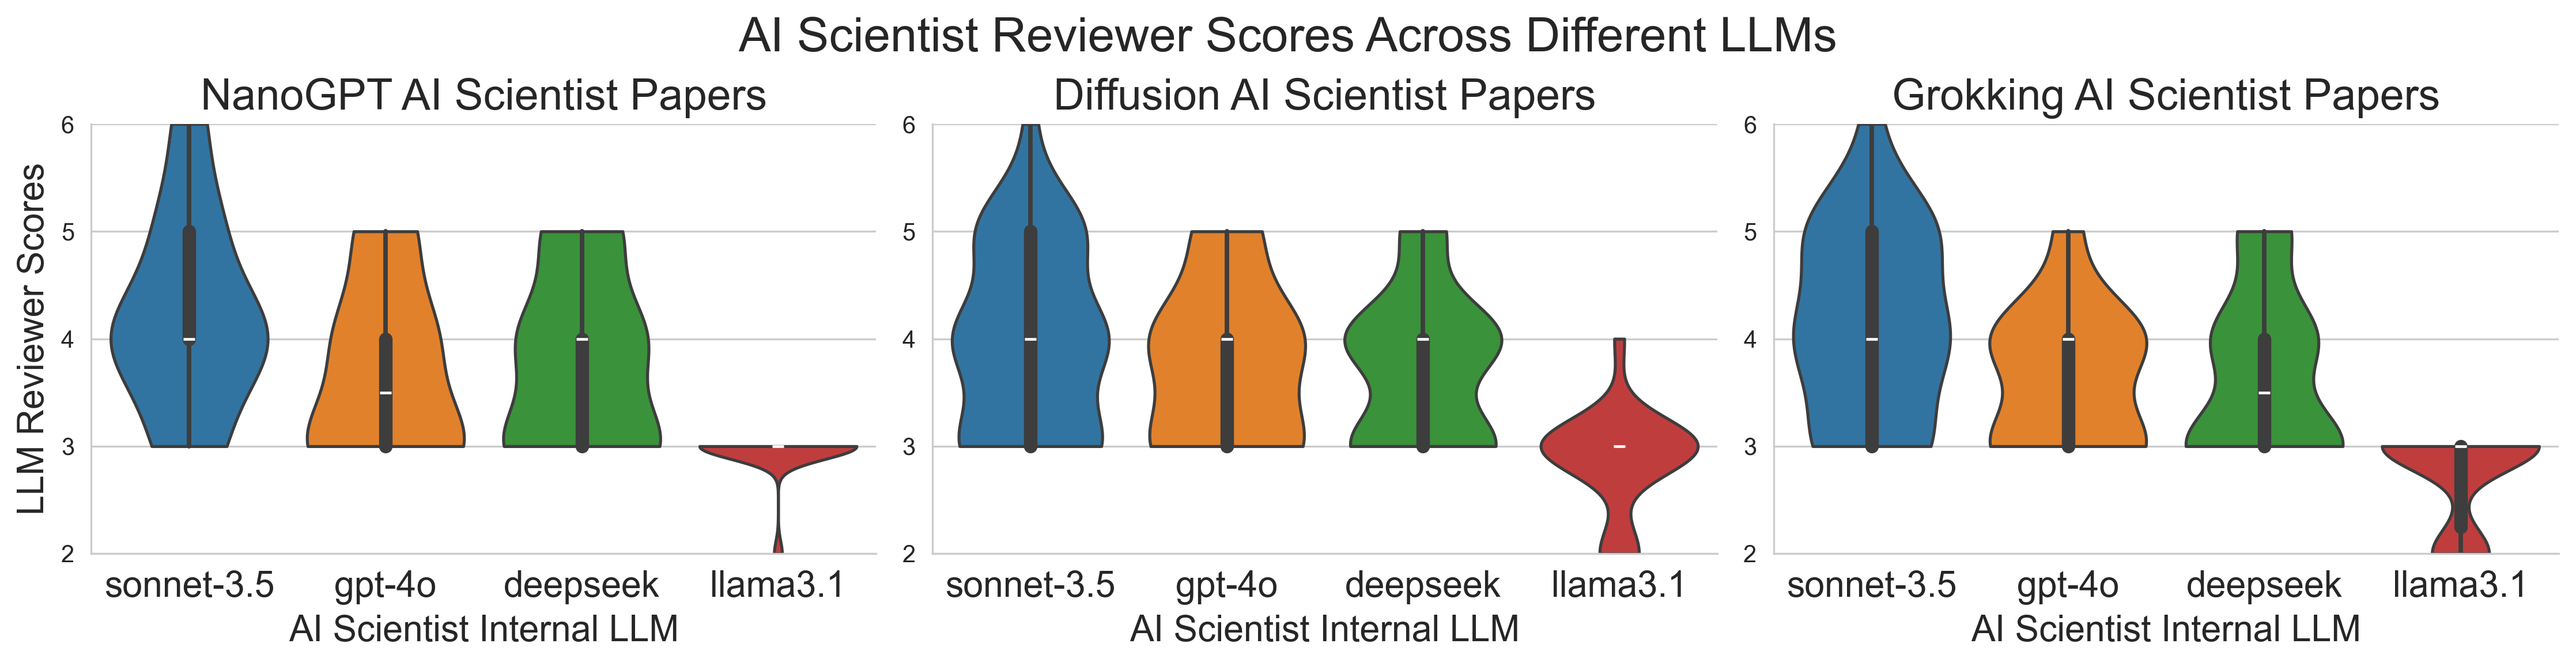

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# sns grid style with lines
sns.set_style("whitegrid")
from matplotlib.ticker import MaxNLocator


sns.violinplot(data=scores_nanogpt_fs_0, ax=axs[0], cut=0)
# set axis splines off
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[0].set_ylabel("LLM Reviewer Scores", fontsize=15)
axs[0].set_xlabel("AI Scientist Internal LLM", fontsize=15)
axs[0].set_title("NanoGPT AI Scientist Papers", fontsize=18)
axs[0].tick_params(axis="x", labelsize=15)
axs[0].set_ylim(2, 6)
axs[0].yaxis.set_major_locator(MaxNLocator(integer=True))


sns.violinplot(data=scores_diffusion_fs_0, ax=axs[1], cut=0)
# set axis splines off
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[1].set_xlabel("AI Scientist Internal LLM", fontsize=15)
axs[1].set_title("Diffusion AI Scientist Papers", fontsize=18)
axs[1].tick_params(axis="x", labelsize=15)
axs[1].set_ylim(2, 6)
axs[1].yaxis.set_major_locator(MaxNLocator(integer=True))

sns.violinplot(data=scores_grokking_fs_0, ax=axs[2], cut=0)
# set axis splines off
axs[2].spines["top"].set_visible(False)
axs[2].spines["right"].set_visible(False)
axs[2].set_xlabel("AI Scientist Internal LLM", fontsize=15)
axs[2].set_title("Grokking AI Scientist Papers", fontsize=18)
axs[2].tick_params(axis="x", labelsize=15)
axs[2].set_ylim(2, 6)
axs[2].yaxis.set_major_locator(MaxNLocator(integer=True))

fig.suptitle("AI Scientist Reviewer Scores Across Different LLMs", fontsize=20, y=0.95)
plt.tight_layout()